## Data Wrangling with  Python

Merging the Data from disparate data sources and storing in a Database

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from bs4 import BeautifulSoup
import requests
import json
import sqlite3
import lxml

In [37]:
# question about library - use ?
pd?

Create flat file data sourceLo

In [3]:
#load file
df=pd.read_csv("AllMakes.csv")

df.head(5)

,make_id,make_name
0,440,Aston Martin
1,441,Tesla
2,442,Jaguar
3,443,Maserati
4,444,Land Rover


In [4]:
#replace headers
df.columns = ['MakeID', 'Brand']

df.head(5)

,MakeID,Brand
0,440,Aston Martin
1,441,Tesla
2,442,Jaguar
3,443,Maserati
4,444,Land Rover


In [5]:
#Format data into a more readable format by removing extra charcaters
df['Brand']= df['Brand'].str.replace(',', '')
df['Brand']= df['Brand'].str.replace('.', '')
df['Brand']= df['Brand'].str.replace('(', '')
df['Brand']= df['Brand'].str.replace('/', ' ')

df.head(5)

,MakeID,Brand
0,440,Aston Martin
1,441,Tesla
2,442,Jaguar
3,443,Maserati
4,444,Land Rover


In [6]:
# Make all strings in MakeName lower
df["Brand"] = df["Brand"].str.lower()

df.head(5)

,MakeID,Brand
0,440,aston martin
1,441,tesla
2,442,jaguar
3,443,maserati
4,444,land rover


In [7]:
# elimnate duplicates
df.drop_duplicates(subset ="Brand", 
                     keep = False, inplace = True) 

Create dataframe for website data

'<!DOCTYPE html>\n<html lang="en-US">\n<head>\n<script type="text/javascript">\n  retval = {"has_service":false,"zip":"","city":"","user":{}};\n  data = {"page_type":"advice","page_name":"Article"};\n\n  data.unique_id = "NEWZ4S7PIFskWbQv";\n\n  // Parse cookie\'d car\n  var ca = (document.cookie || "").split(";");\n  var carobj = {};\n  for (var i = 0; i < ca.length; i++) {\n    var cval = (ca[i] || "").split("=");\n    if (cval.length === 2 && (!!cval[0].match(/ymCar/) || !!cval[0].match(/ymCse/))) {\n      try {\n        var json = JSON.parse(decodeURIComponent(cval[1]));\n        carobj = !cval[0].match(/ymCar/) ? (json.car || {}) : json;\n      } catch (e) {\n        carobj = {};\n      }\n      break;\n    }\n  }\n  // If empty, fill it with a car from the user\'s account\n  if ((carobj.make || \'*\') === \'*\') {\n    carobj = (retval.user && retval.user.car) || {};\n  }\n\n  // Plugin servicable area tag\n  data.is_servicable = !!retval.has_service ? retval.city : \'no\';\n  da
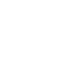
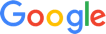

In [8]:
#load source code fom wen page for soup
fd = open("article_the-most-and-least-expensive-cars-to-maintain.html", "r", encoding="utf-8")
soup = BeautifulSoup(fd)
fd.close()

str(soup)

In [9]:
#find First table and load to dataframe
foundtext = soup.find('p',text="But not every car costs the same to keep it running. And different cars have varying risks of leaving their drivers suddenly immobilized. ") 
table = foundtext.findNext('table') 
df1 = pd.read_html(str(table))[0]

df1.head(5)

,Which Car Brands Cost the Most to Maintain?,Which Car Brands Cost the Most to Maintain?.1,Which Car Brands Cost the Most to Maintain?.2
0,Based on estimates of total car maintenance ov...,Based on estimates of total car maintenance ov...,Based on estimates of total car maintenance ov...
1,Rank,Car Brand,Cost
2,1,BMW,"$17,800"
3,2,Mercedes-Benz,"$12,900"
4,3,Cadillac,"$12,500"


In [10]:
#remove first two rows
df1 = df1.iloc[2:]

df1.head(5)

,Which Car Brands Cost the Most to Maintain?,Which Car Brands Cost the Most to Maintain?.1,Which Car Brands Cost the Most to Maintain?.2
2,1,BMW,"$17,800"
3,2,Mercedes-Benz,"$12,900"
4,3,Cadillac,"$12,500"
5,4,Volvo,"$12,500"
6,5,Audi,"$12,400"


In [11]:
#replace headers
df1.columns = ['Most to Maintain Rank', 'Brand', 'Cost'] 

df1.head(5)

,Most to Maintain Rank,Brand,Cost
2,1,BMW,"$17,800"
3,2,Mercedes-Benz,"$12,900"
4,3,Cadillac,"$12,500"
5,4,Volvo,"$12,500"
6,5,Audi,"$12,400"


In [12]:
#find second table and load to dataframe
foundtext = soup.find('p',text="Mercury is the brand that suffered most chronically from a design flaw. In this case, Mercury cars most frequently had fuel pump issues (Mercury was discontinued by parent company Ford in 2011). ") 
table = foundtext.findNext('table') 
df2 = pd.read_html(str(table))[0]

#remove first two rows
df2 = df2.iloc[2:]

#Replace Headers
df2.columns =['Most Likely Not To Start Rank', 'Brand', 'Not Start Frequency']

df2.head(5)

,Most Likely Not To Start Rank,Brand,Not Start Frequency
2,1,Hummer,9x
3,2,Mercury,6x
4,3,Chrysler,6x
5,4,Saturn,5x
6,5,Dodge,5x


In [13]:
#find third table and load to dataframe
foundtext = soup.find('p',text="We looked at which brands have maintenance requirements that occur unusually often for that particular brand. For each brand and issue, we compared the frequency to the median across all the cars we serviced.") 
table = foundtext.findNext('table')
df3 = pd.read_html(str(table))[0]

#remove first two rows
df3 = df3.iloc[2:]

#replace headers
df3.columns =['Brand', 'Uncommon Issue', 'Uncommon Frequency']

df3.head(5)

,Brand,Uncommon Issue,Uncommon Frequency
2,Mercury,Fuel pump replacement,28x
3,Chrysler,Exhaust gas recirculation/EGR valve replacement,24x
4,Infiniti,Camshaft position sensor replacement,21x
5,Cadillac,Intake manifold gasket replacement,19x
6,Jaguar,Check Engine Light is on inspection,19x


In [14]:
#merge df1 and df2 on brand with outter join
outer_merged = pd.merge(df1, df2, how="outer", on=["Brand", "Brand"])

outer_merged.head(5)

,Most to Maintain Rank,Brand,Cost,Most Likely Not To Start Rank,Not Start Frequency
0,1,BMW,"$17,800",7,4x
1,2,Mercedes-Benz,"$12,900",12,3x
2,3,Cadillac,"$12,500",18,2x
3,4,Volvo,"$12,500",23,2x
4,5,Audi,"$12,400",NaN,NaN


In [15]:
#merge outer_merged and df3 on brand with outter join
outer_merged = pd.merge(outer_merged, df3, how="outer", on=["Brand", "Brand"])

outer_merged.head(5)

,Most to Maintain Rank,Brand,Cost,Most Likely Not To Start Rank,Not Start Frequency,Uncommon Issue,Uncommon Frequency
0,1,BMW,"$17,800",7,4x,Window regulator replacement,18x
1,1,BMW,"$17,800",7,4x,Idler pulley replacement,18x
2,1,BMW,"$17,800",7,4x,Drive belt tensioner replacement,16x
3,2,Mercedes-Benz,"$12,900",12,3x,Crankshaft position sensor,15x
4,3,Cadillac,"$12,500",18,2x,Intake manifold gasket replacement,19x


In [16]:
# Make all strings in Brand lower
outer_merged["Brand"] = outer_merged["Brand"].str.lower()

outer_merged.head(5)

,Most to Maintain Rank,Brand,Cost,Most Likely Not To Start Rank,Not Start Frequency,Uncommon Issue,Uncommon Frequency
0,1,bmw,"$17,800",7,4x,Window regulator replacement,18x
1,1,bmw,"$17,800",7,4x,Idler pulley replacement,18x
2,1,bmw,"$17,800",7,4x,Drive belt tensioner replacement,16x
3,2,mercedes-benz,"$12,900",12,3x,Crankshaft position sensor,15x
4,3,cadillac,"$12,500",18,2x,Intake manifold gasket replacement,19x


Create dataframe from JSON source

In [17]:
# reqeust and load data into Json object
url = 'https://vpic.nhtsa.dot.gov/api/vehicles/getallmanufacturers?format=json'
data = requests.get(url).text
json_data=json.loads(data)

str(json_data)

"{'Count': 94, 'Message': 'Response returned successfully', 'SearchCriteria': None, 'Results': [{'Country': 'UNITED STATES (USA)', 'Mfr_CommonName': 'Tesla', 'Mfr_ID': 955, 'Mfr_Name': 'TESLA, INC.', 'VehicleTypes': [{'IsPrimary': True, 'Name': 'Passenger Car'}, {'IsPrimary': False, 'Name': 'Multipurpose Passenger Vehicle (MPV)'}]}, {'Country': 'UNITED KINGDOM (UK)', 'Mfr_CommonName': 'Aston Martin', 'Mfr_ID': 956, 'Mfr_Name': 'ASTON MARTIN LAGONDA LIMITED', 'VehicleTypes': [{'IsPrimary': False, 'Name': 'Passenger Car'}]}, {'Country': 'UNITED STATES (USA)', 'Mfr_CommonName': 'BMW', 'Mfr_ID': 957, 'Mfr_Name': 'BMW OF NORTH AMERICA, LLC', 'VehicleTypes': []}, {'Country': 'UNITED STATES (USA)', 'Mfr_CommonName': 'Jaguar Land Rover', 'Mfr_ID': 958, 'Mfr_Name': 'JAGUAR LAND ROVER NORTH AMERICA LLC', 'VehicleTypes': [{'IsPrimary': True, 'Name': 'Passenger Car'}, {'IsPrimary': False, 'Name': 'Truck '}, {'IsPrimary': False, 'Name': 'Multipurpose Passenger Vehicle (MPV)'}]}, {'Country': 'UNITED

In [18]:
# create dataframe for key
df4 = pd.DataFrame.from_dict(json_data['Results'])

df4.head(5)

,Country,Mfr_CommonName,Mfr_ID,Mfr_Name,VehicleTypes
0,UNITED STATES (USA),Tesla,955,"TESLA, INC.","[{'IsPrimary': True, 'Name': 'Passenger Car'},..."
1,UNITED KINGDOM (UK),Aston Martin,956,ASTON MARTIN LAGONDA LIMITED,"[{'IsPrimary': False, 'Name': 'Passenger Car'}]"
2,UNITED STATES (USA),BMW,957,"BMW OF NORTH AMERICA, LLC",[]
3,UNITED STATES (USA),Jaguar Land Rover,958,JAGUAR LAND ROVER NORTH AMERICA LLC,"[{'IsPrimary': True, 'Name': 'Passenger Car'},..."
4,UNITED STATES (USA),Maserati,959,"MASERATI NORTH AMERICA, INC.","[{'IsPrimary': True, 'Name': 'Passenger Car'},..."


In [19]:
# create dataframe for desired columns
df5 = df4[['Mfr_CommonName', 'Country']]

# replace headers
df5.columns =['Brand', 'Country']

df5.head(5)

,Brand,Country
0,Tesla,UNITED STATES (USA)
1,Aston Martin,UNITED KINGDOM (UK)
2,BMW,UNITED STATES (USA)
3,Jaguar Land Rover,UNITED STATES (USA)
4,Maserati,UNITED STATES (USA)


In [20]:
# replace uk and us values
df5["Country"] = df5["Country"].replace({"UNITED STATES (USA)": "united states",
                                                   "UNITED KINGDOM (UK)": "united kingdom"})

# Make columns lower case
df5["Brand"] = df5["Brand"].str.lower()
df5["Country"] = df5["Country"].str.lower()


#replace volvo
df5["Brand"] = df5["Brand"].replace({"volvo (truck / bus)": "volvo"})

df5.head(5)

C:\Users\dmeiners\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dmeiners\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\dmeiners\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,Brand,Country
0,tesla,united states
1,aston martin,united kingdom
2,bmw,united states
3,jaguar land rover,united states
4,maserati,united states


Create Tables in database with dataframes

In [21]:
# Create your connection.
cnx = sqlite3.connect(':memory:')

#create table in database for flat
df.to_sql(name='allMakes', con=cnx, index=False)

#create table in database for website
outer_merged.to_sql(name='brandRanksIssues', con=cnx, index=False)

#create table in database for json
df5.to_sql(name='brandCountry', con=cnx, index=False)

pd.read_sql('select * from allMakes', cnx)

C:\Users\dmeiners\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:2612: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


,MakeID,Brand
0,440,aston martin
1,441,tesla
2,442,jaguar
3,443,maserati
4,444,land rover
...,...,...
9285,10473,american vacuum
9286,10474,precision fab
9287,10475,gray's
9288,10476,gobe


In [22]:
# create dataframe for makes
allMakes = pd.read_sql('select * from allMakes', cnx)

# remove column for make id value
allMakes =  allMakes.drop(['MakeID'], axis=1)

allMakes.head(5)

,Brand
0,aston martin
1,tesla
2,jaguar
3,maserati
4,land rover


In [23]:
#create dataframe for rank and issues
rankIssues = pd.read_sql('select * from brandRanksIssues', cnx)

rankIssues.head(5)

,Most to Maintain Rank,Brand,Cost,Most Likely Not To Start Rank,Not Start Frequency,Uncommon Issue,Uncommon Frequency
0,1,bmw,"$17,800",7,4x,Window regulator replacement,18x
1,1,bmw,"$17,800",7,4x,Idler pulley replacement,18x
2,1,bmw,"$17,800",7,4x,Drive belt tensioner replacement,16x
3,2,mercedes-benz,"$12,900",12,3x,Crankshaft position sensor,15x
4,3,cadillac,"$12,500",18,2x,Intake manifold gasket replacement,19x


In [24]:
# create dataframe for country
country = pd.read_sql('select * from brandCountry', cnx)

country.head(5)

,Brand,Country
0,tesla,united states
1,aston martin,united kingdom
2,bmw,united states
3,jaguar land rover,united states
4,maserati,united states


In [25]:
# create dataframe by merging 
merged_data = pd.merge(allMakes, rankIssues, how="outer", on=["Brand", "Brand"])

#create dateframe by merging
merged_data = pd.merge(merged_data, country, how="outer", on=["Brand", "Brand"])

#remove unwanted row from dataframe
merged_data = merged_data.loc[merged_data['Brand'] != 'car brand']

Visualizations

In [26]:
# create dataframe with selected columns
plot_df = merged_data[['Brand', 'Most Likely Not To Start Rank']]

# drop rows with none and  na
plot_df = plot_df.loc[plot_df['Most Likely Not To Start Rank'] != 'None'].dropna()

#convert column to int
plot_df["Most Likely Not To Start Rank"] = plot_df["Most Likely Not To Start Rank"].astype(int)

# create dataframe with values less than 10 for rank
plot_df = plot_df.loc[plot_df['Most Likely Not To Start Rank'] < 10]

# remove duplicates
plot_df.drop_duplicates(subset ="Most Likely Not To Start Rank", 
                     keep = False, inplace = True) 

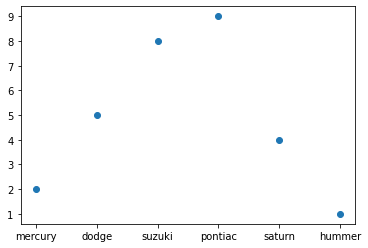

In [27]:
# cars most likely not to start with coresponding rank
plt.scatter(plot_df['Brand'] , plot_df['Most Likely Not To Start Rank'])

In [28]:
#create dataframe with specified columns
plot_df2 = merged_data[['Brand', 'Most to Maintain Rank']]

# remove rows with none and drop na
plot_df2 = plot_df2.loc[plot_df2['Most to Maintain Rank'] != 'None'].dropna()

# remove duplicates
plot_df2.drop_duplicates(subset ="Most to Maintain Rank", 
                     keep = False, inplace = True) 

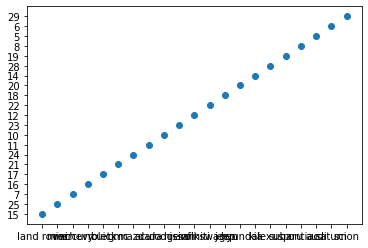

In [29]:
# cars most likely not to start with coresponding rank
plt.scatter(plot_df2['Brand'] , plot_df2['Most to Maintain Rank'])

In [30]:
# create dataframe for columns
plot_df3 = merged_data[['Brand', 'Cost']]

# remove rows with none and na and convert to string
plot_df3 = plot_df3.loc[plot_df3['Cost'] != 'None'].dropna().astype(str)

# remove values for conversion
plot_df3['Cost']= plot_df3['Cost'].str.replace(',', '').str.replace('$', '')

# recreate column as float
plot_df3['Cost'] = plot_df3['Cost'].astype(float)

# set dataframe with cost > 5k
plot_df3 = plot_df3.loc[plot_df3['Cost'] > 5000]

# remove duplicates
plot_df3.drop_duplicates(subset ="Cost", 
                     keep = False, inplace = True) 

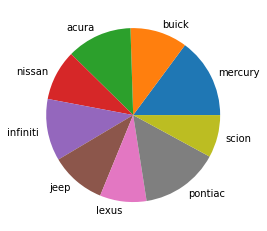

In [31]:
# Pie plot of cars companies with cost higher than 5k
plt.pie(plot_df3['Cost'], labels = plot_df3['Brand'] ) 

plt.show()

In [32]:
#create dataframe for columns
plot_df4 = merged_data[['Brand', 'Not Start Frequency']]

#drop na values and rows with None
plot_df4 = plot_df4.loc[plot_df4['Not Start Frequency'] != 'None'].dropna().astype(str)

# remove duplicates
plot_df4.drop_duplicates(subset ="Brand", 
                     keep = False, inplace = True) 

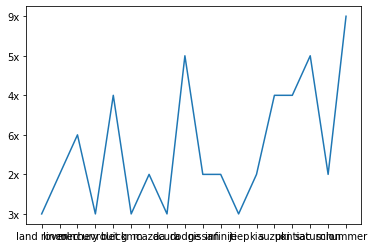

In [33]:
# Plot not start fequency by brand
plt.plot(plot_df4['Brand'] , plot_df4['Not Start Frequency'])

{'whiskers': [<matplotlib.lines.Line2D at 0x12ce56f7cf8>,
 'caps': [<matplotlib.lines.Line2D at 0x12ce57092e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x12ce56f7c50>],
 'medians': [<matplotlib.lines.Line2D at 0x12ce5709898>],
 'fliers': [<matplotlib.lines.Line2D at 0x12ce5709b70>],
 'means': []}

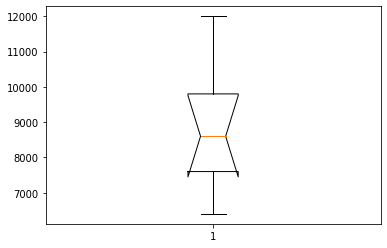

In [34]:
# Boxplot of cost range for meintaining cars > 5k
plt.boxplot(plot_df3['Cost'], notch=True)